<a href="https://colab.research.google.com/github/ehsan-lari/Conformal-Prediction/blob/main/ConformalPrediction_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Generate synthetic data
n = 1000
X = np.random.uniform(-3, 3, size=(n, 1))
y = np.sin(X).ravel() + np.random.normal(0, 0.2, size=n)

# Split into training and calibration sets
X_train, X_cal, y_train, y_cal = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict on calibration set and compute residuals
y_cal_pred = model.predict(X_cal)
residuals = np.abs(y_cal - y_cal_pred)

# Compute quantile of residuals
alpha = 0.1
q_hat = np.quantile(residuals, 1 - alpha)

# Predict on test point
def conformal_predict(x_test):
    y_pred = model.predict(x_test)
    lower = y_pred - q_hat
    upper = y_pred + q_hat
    return np.vstack([lower, upper]).T  # shape (n_samples, 2)

# Example usage
x_new = np.array([[0.5], [1.0], [-1.5]])
intervals = conformal_predict(x_new)
print(intervals)

[[ 0.23908239  1.00389451]
 [ 0.47074969  1.23556181]
 [-1.4469376  -0.68212548]]


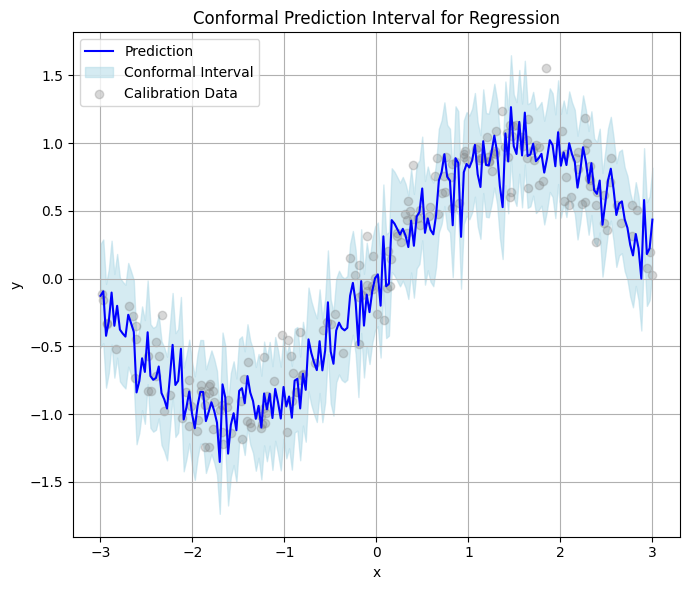

In [3]:
import matplotlib.pyplot as plt

# Create test inputs
X_test = np.linspace(-3, 3, 200).reshape(-1, 1)
y_pred = model.predict(X_test)
intervals = conformal_predict(X_test)
lower, upper = intervals[:, 0], intervals[:, 1]

# Plot
plt.figure(figsize=(7, 6))
plt.plot(X_test, y_pred, label='Prediction', color='blue')
plt.fill_between(X_test.ravel(), lower, upper, color='lightblue', alpha=0.5, label='Conformal Interval')
plt.scatter(X_cal, y_cal, color='gray', alpha=0.3, label='Calibration Data')
plt.title("Conformal Prediction Interval for Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
